In [1]:
import seaborn as sns
import pickle as pkl

In [2]:
pars = pkl.load(open('/Users/Gilles/Dropbox/Science/tdcs/data/fitted_params_fastdm.pkl'))

In [3]:
a = pars.melted_parameters('a')

In [4]:
a

,subj_idx,a,acc_spd,tdcs
0,S1,1.1570,acc,anodal
1,S10,1.1559,acc,anodal
2,S11,0.9402,acc,anodal
3,S12,1.1644,acc,anodal
4,S13,1.2822,acc,anodal
5,S14,1.3203,acc,anodal
6,S15,0.9257,acc,anodal
7,S2,1.0707,acc,anodal
8,S3,0.8090,acc,anodal
9,S4,1.1400,acc,anodal


In [5]:
ap = a.pivot_table(index='subj_idx', columns='tdcs', values='a')

In [6]:
ap

tdcs,anodal,sham
subj_idx,,
A10,1.06080,0.89465
A11,0.89745,1.12680
A12,0.96865,0.81300
A13,1.11845,1.18245
A14,0.94425,1.00105
A15,0.96040,0.97390
A16,0.98365,0.99740
A17,1.04990,1.22075
A2,1.12825,1.16320


In [7]:
diff_values = ap['sham'] - ap['anodal']

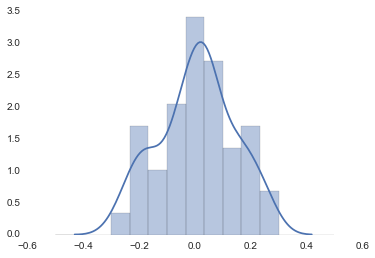

In [8]:
sns.distplot(diff_values, bins=np.linspace(-.5, .5, 16))

In [9]:
diff_values.shape

(44,)

In [10]:
(diff_values > 0).sum()

25

In [11]:
import sklearn
from sklearn import mixture

In [12]:
## 1 parameter

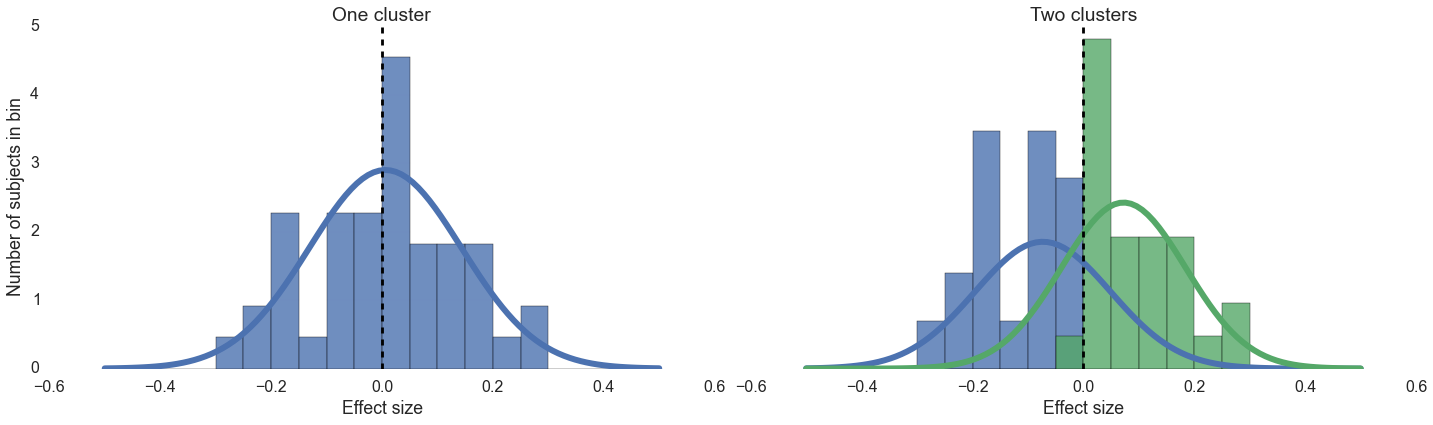

In [18]:
plt.figure(figsize=(20, 6))
# plt.suptitle('Clustering analysis on effect sizes mean threshold anodal - sham stimulation',fontsize=24)
x = diff_values.values[:,np.newaxis]
gmm1 = sklearn.mixture.GMM(n_components=1)
gmm1.fit(x)
pred = gmm1.predict(x)

n_bins = 21

sns.set_context('poster')
plt.subplot(1,2,1)
plt.title('One cluster')

#sns.distplot(x[pred == 0], bins=np.linspace(-.5, .5, 25))
#sns.distplot(x[pred == 1], bins=np.linspace(-.5, .5, 25), norm_hist=True)
plt.hist(x[pred == 0], normed=True, bins=np.linspace(-.5, .5, n_bins), color=sns.color_palette()[0], alpha=0.8)
plt.plot(np.linspace(-.5, .5, 100), sp.stats.norm(loc=gmm1.means_, scale=np.sqrt(gmm1.covars_)).pdf(np.linspace(-.5, .5, 100)).T * gmm1.weights_, color=sns.color_palette()[0], lw=6)
plt.axvline(0, c='k', ls='--')
plt.xlabel('Effect size')

gmm2 = sklearn.mixture.GMM(n_components=2)
gmm2.fit(x)
pred = gmm2.predict(x)
plt.ylabel('Number of subjects in bin')

plt.subplot(1,2,2)
plt.title('Two clusters')
#sns.distplot(x[pred == 0], bins=np.linspace(-.5, .5, 25))
#sns.distplot(x[pred == 1], bins=np.linspace(-.5, .5, 25), norm_hist=True)
plt.hist(x[pred == 0], normed=True, bins=np.linspace(-.5, .5, n_bins), color=sns.color_palette()[0], alpha=0.8)
plt.hist(x[pred == 1], normed=True, bins=np.linspace(-.5, .5, n_bins), color=sns.color_palette()[1], alpha=0.8)
plt.plot(np.linspace(-.5, .5, 100), sp.stats.norm(loc=gmm2.means_[0], scale=np.sqrt(gmm2.covars_[0])).pdf(np.linspace(-.5, .5, 100)).T * gmm2.weights_[0] * 2, color=sns.color_palette()[0], lw=6)
plt.plot(np.linspace(-.5, .5, 100), sp.stats.norm(loc=gmm2.means_[1], scale=np.sqrt(gmm2.covars_[1])).pdf(np.linspace(-.5, .5, 100)).T * gmm2.weights_[1] * 2, color=sns.color_palette()[1], lw=6)
plt.gca().set_yticks([])
plt.xlabel('Effect size')

plt.axvline(0, c='k', ls='--')
plt.tight_layout()

plt.savefig('figure5.svg', transparent=True)
plt.savefig('figure5.eps', transparent=True)
plt.savefig('figure5.png', dpi=300)

In [135]:
print gmm1.bic(x), gmm2.bic(x)
delta_i = gmm2.bic(x) - gmm1.bic(x)
print np.exp(-delta_i / 2) / (np.exp(-gmm1.bic(x)/2) + np.exp(-gmm2.bic(x)/2))
print 1 / (np.exp(-delta_i / 2) / (np.exp(-gmm1.bic(x)/2) + np.exp(-gmm2.bic(x)/2)))

-44.4561352047 -33.6506387912
9.95720418438e-13
1.0042979751e+12


In [106]:
gmm1.bic

<bound method GMM.bic of GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)>